In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import testing_test_size as testing
    import RelativePaths as RP
    import Evaluation as Eva
    import Utils

system = 'jabref'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)

files = config['file locations'][system]
preprocess_settings = config['preprocess settings list']

In [3]:
# set file_locations which will be relative to computer in use
from pathlib import Path

system_folder = str(Path.cwd().parent / files['system folder'])

raw_data_csv = str(Path.cwd().parent / files['raw data'])
tmp_csv = str(Path.cwd().parent / files['tmp data'])

processed_data_csv = str(Path.cwd().parent / files['data size abs num'])

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

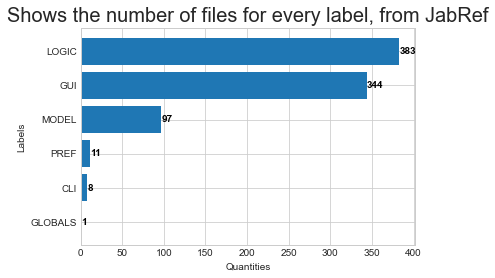

In [4]:
dataset_df = pd.read_csv(raw_data_csv)
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef',fontsize = 20)

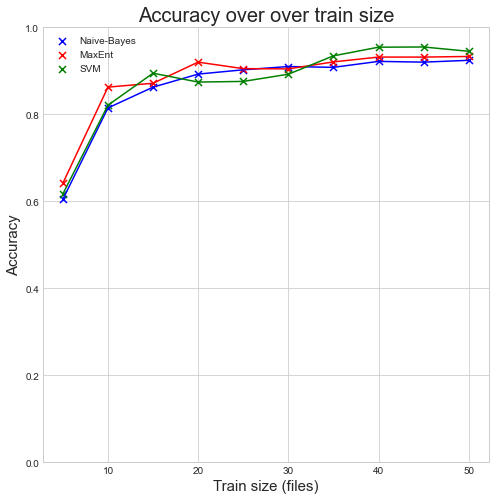

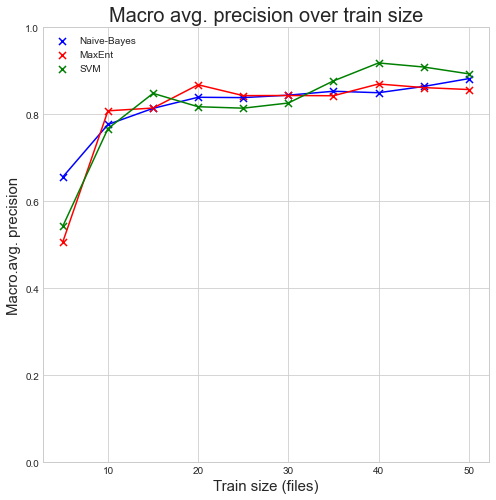

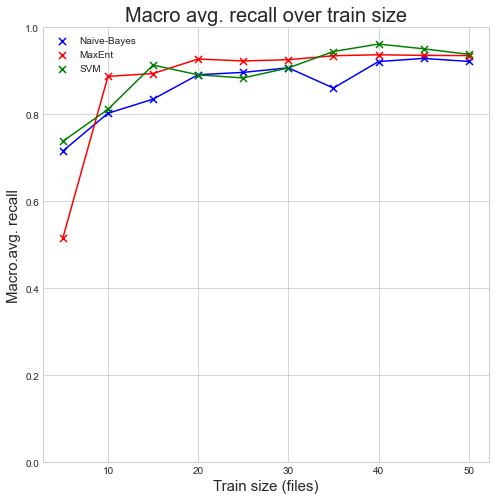

In [5]:
# Parse the data according to the rules above
setting = preprocess_settings['s0']
Prep.preprocess_settings(setting, raw_data_csv, tmp_csv)
tmp_df = pd.read_csv(tmp_csv)
# Remove GLOBALS and CLI from the dataset
testing.testing_test_size(tmp_df, 5, 5, 50, CountVectorizer(), abs_size=True)

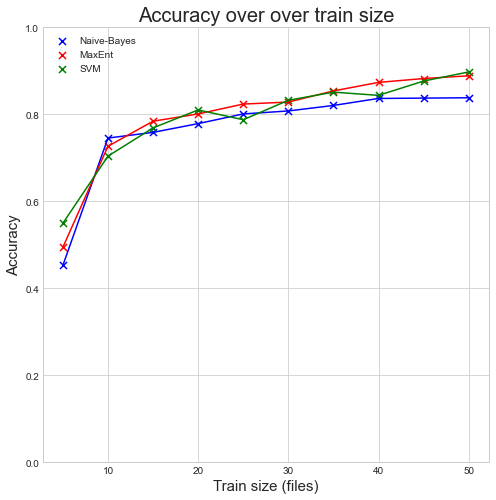

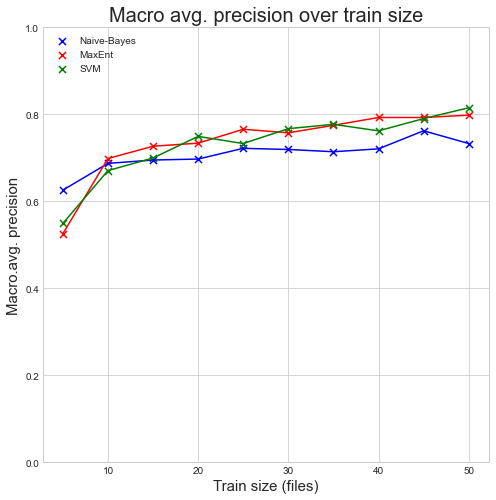

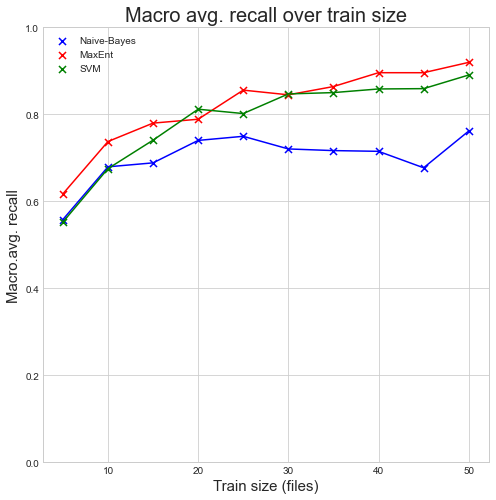

In [6]:
# Parse the data according to the rules above
setting = preprocess_settings['s1']
Prep.preprocess_settings(setting, raw_data_csv, tmp_csv)
tmp_df = pd.read_csv(tmp_csv)
# Remove GLOBALS and CLI from the dataset
testing.testing_test_size(tmp_df, 5, 5, 50, CountVectorizer(), abs_size=True)


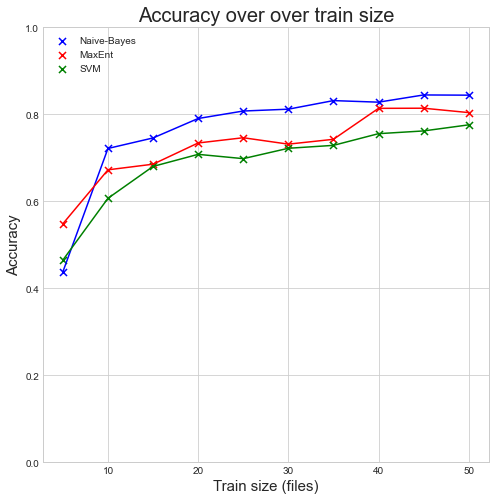

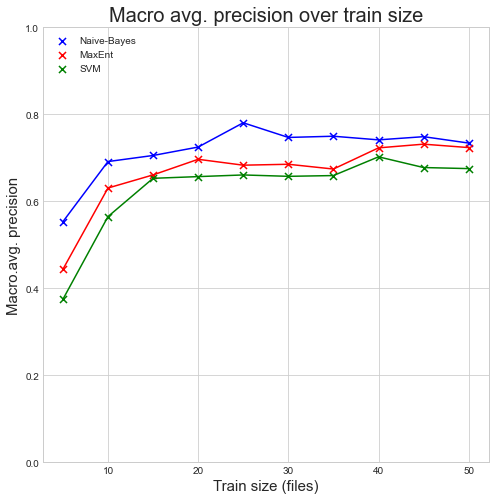

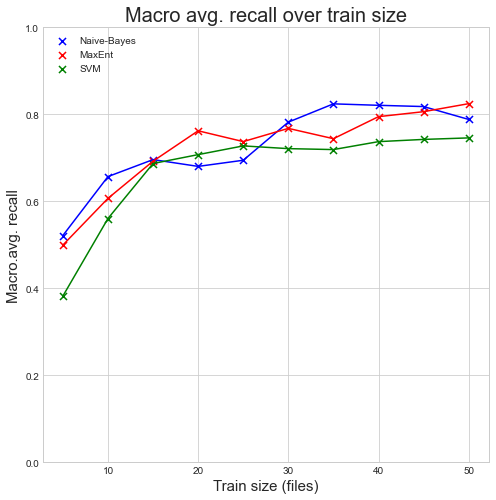

In [7]:
# Parse the data according to the rules above
setting = preprocess_settings['s2']
Prep.preprocess_settings(setting, raw_data_csv, tmp_csv)
tmp_df = pd.read_csv(tmp_csv)
# Remove GLOBALS and CLI from the dataset
testing.testing_test_size(tmp_df, 5, 5, 50, CountVectorizer(), abs_size=True)
